# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


## Primeiro, irei traduzir as colunas e as categorias
### Verificação de colunas, dados e transformações necessárias. 

In [3]:
# Renomear colunas para português
df.rename(columns={
    'Age': 'Idade',
    'Gender': 'Genero',
    'Income': 'Renda',
    'Education': 'Escolaridade',
    'Marital Status': 'Estado_Civil',
    'Number of Children': 'Qtd_Filhos',
    'Home Ownership': 'Residencia',
    'Credit Score': 'Score_Credito'
}, inplace=True)

# Traduzir conteúdos categóricos (exemplo: valores únicos)
categorical_columns = ['Genero', 'Escolaridade', 'Estado_Civil', 'Residencia', 'Score_Credito']
conteudos_antes = {col: df[col].unique().tolist() for col in categorical_columns}

conteudos_antes


{'Genero': ['Female', 'Male'],
 'Escolaridade': ["Bachelor's Degree",
  "Master's Degree",
  'Doctorate',
  'High School Diploma',
  "Associate's Degree"],
 'Estado_Civil': ['Single', 'Married'],
 'Residencia': ['Rented', 'Owned'],
 'Score_Credito': ['High', 'Average', 'Low']}

In [4]:
# Dicionários de tradução para cada coluna categórica
traducoes = {
    'Genero': {'Female': 'Feminino', 'Male': 'Masculino'},
    'Escolaridade': {
        "Bachelor's Degree": 'Graduação',
        "Master's Degree": 'Mestrado',
        'Doctorate': 'Doutorado',
        'High School Diploma': 'Ensino Médio',
        "Associate's Degree": 'Tecnólogo'
    },
    'Estado_Civil': {'Single': 'Solteiro(a)', 'Married': 'Casado(a)'},
    'Residencia': {'Rented': 'Alugada', 'Owned': 'Própria'},
    'Score_Credito': {'High': 'Alto', 'Average': 'Médio', 'Low': 'Baixo'}
}

# Aplicar traduções
for coluna, mapa in traducoes.items():
    df[coluna] = df[coluna].map(mapa)

# Verificar o resultado após as traduções
df.head()


,Idade,Genero,Renda,Escolaridade,Estado_Civil,Qtd_Filhos,Residencia,Score_Credito
0,25.0,Feminino,"50.000,00",Graduação,Solteiro(a),0,Alugada,Alto
1,30.0,Masculino,"100.000,00",Mestrado,Casado(a),2,Própria,Alto
2,35.0,Feminino,"75.000,00",Doutorado,Casado(a),1,Própria,Alto
3,40.0,Masculino,"125.000,00",Ensino Médio,Solteiro(a),0,Própria,Alto
4,45.0,Feminino,"100.000,00",Graduação,Casado(a),3,Própria,Alto


## Verificar os tipos de dados das colunas e valores ausentes

In [6]:
# Verificar os tipos de dados das colunas
tipos_dados = df.dtypes

# Verificar se há valores ausentes
valores_nulos = df.isnull().sum()

tipos_dados, valores_nulos

(Idade            float64
 Genero            object
 Renda             object
 Escolaridade      object
 Estado_Civil      object
 Qtd_Filhos         int64
 Residencia        object
 Score_Credito     object
 dtype: object,
 Idade            34
 Genero            0
 Renda             0
 Escolaridade      0
 Estado_Civil      0
 Qtd_Filhos        0
 Residencia        0
 Score_Credito     0
 dtype: int64)

##  Transformação dos tipos de dados:

Renda foi convertida para float.

Os demais tipos estão adequados:

Numéricos: Idade, Renda, Qtd_Filhos

Categóricos: Genero, Escolaridade, Estado_Civil, Residencia, Score_Credito

Dados faltantes encontrados:
A coluna Idade possui 34 valores ausentes.

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

###  Preencher os valores ausentes da coluna 'Idade' com a mediana  e verificar novamente se há valores ausentes

In [7]:
# Preencher os valores ausentes da coluna 'Idade' com a mediana
mediana_idade = df['Idade'].median()
df['Idade'].fillna(mediana_idade, inplace=True)

# Verificar novamente se há valores ausentes
valores_nulos_apos = df.isnull().sum()

valores_nulos_apos

C:\Users\karin\AppData\Local\Temp\ipykernel_17248\1082202164.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Idade'].fillna(mediana_idade, inplace=True)


Idade            0
Genero           0
Renda            0
Escolaridade     0
Estado_Civil     0
Qtd_Filhos       0
Residencia       0
Score_Credito    0
dtype: int64

### 1. Visualizar graficamente os valores ausentes (antes do tratamento)

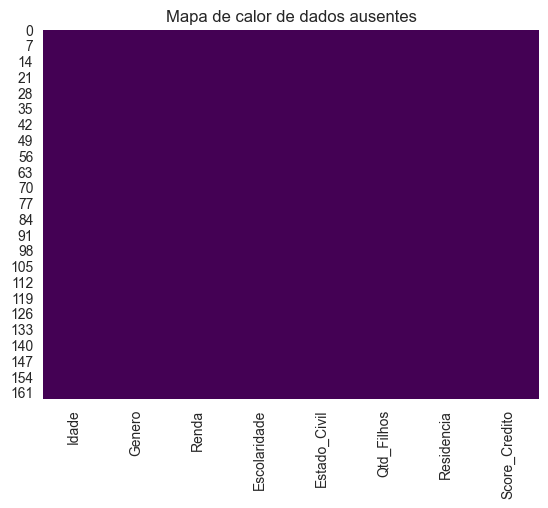

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de dados ausentes")
plt.show()


###  Significado do gráfico:
O sns.heatmap(df.isnull()) mostra True em amarelo e False em roxo (por padrão no viridis).

Como todos os valores são False (sem nulos), o gráfico aparece todo roxo ou rosa, sem destaque.

### Optei por preencher os valores ausentes da variável Idade utilizando a mediana. Essa abordagem é adequada pois a mediana é menos sensível a outliers e mantém a distribuição da variável próxima do original. Como Idade é uma variável numérica contínua, isso garante maior estabilidade para os modelos futuros.

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [9]:
# Verificar os valores únicos nas variáveis categóricas
for coluna in ['Genero', 'Escolaridade', 'Estado_Civil', 'Residencia', 'Score_Credito']:
    print(f"\nValores únicos em {coluna}:")
    print(df[coluna].unique())


Valores únicos em Genero:
['Feminino' 'Masculino']

Valores únicos em Escolaridade:
['Graduação' 'Mestrado' 'Doutorado' 'Ensino Médio' 'Tecnólogo']

Valores únicos em Estado_Civil:
['Solteiro(a)' 'Casado(a)']

Valores únicos em Residencia:
['Alugada' 'Própria']

Valores únicos em Score_Credito:
['Alto' 'Médio' 'Baixo']


#### Resultado:
Nenhum valor inválido foi encontrado. Todos os dados categóricos estão consistentes e padronizados, conforme esperado.

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

### Irei realizar Estatísticas descritivas para variáveis numéricas e Plotar boxplots para visualizar possíveis outliers

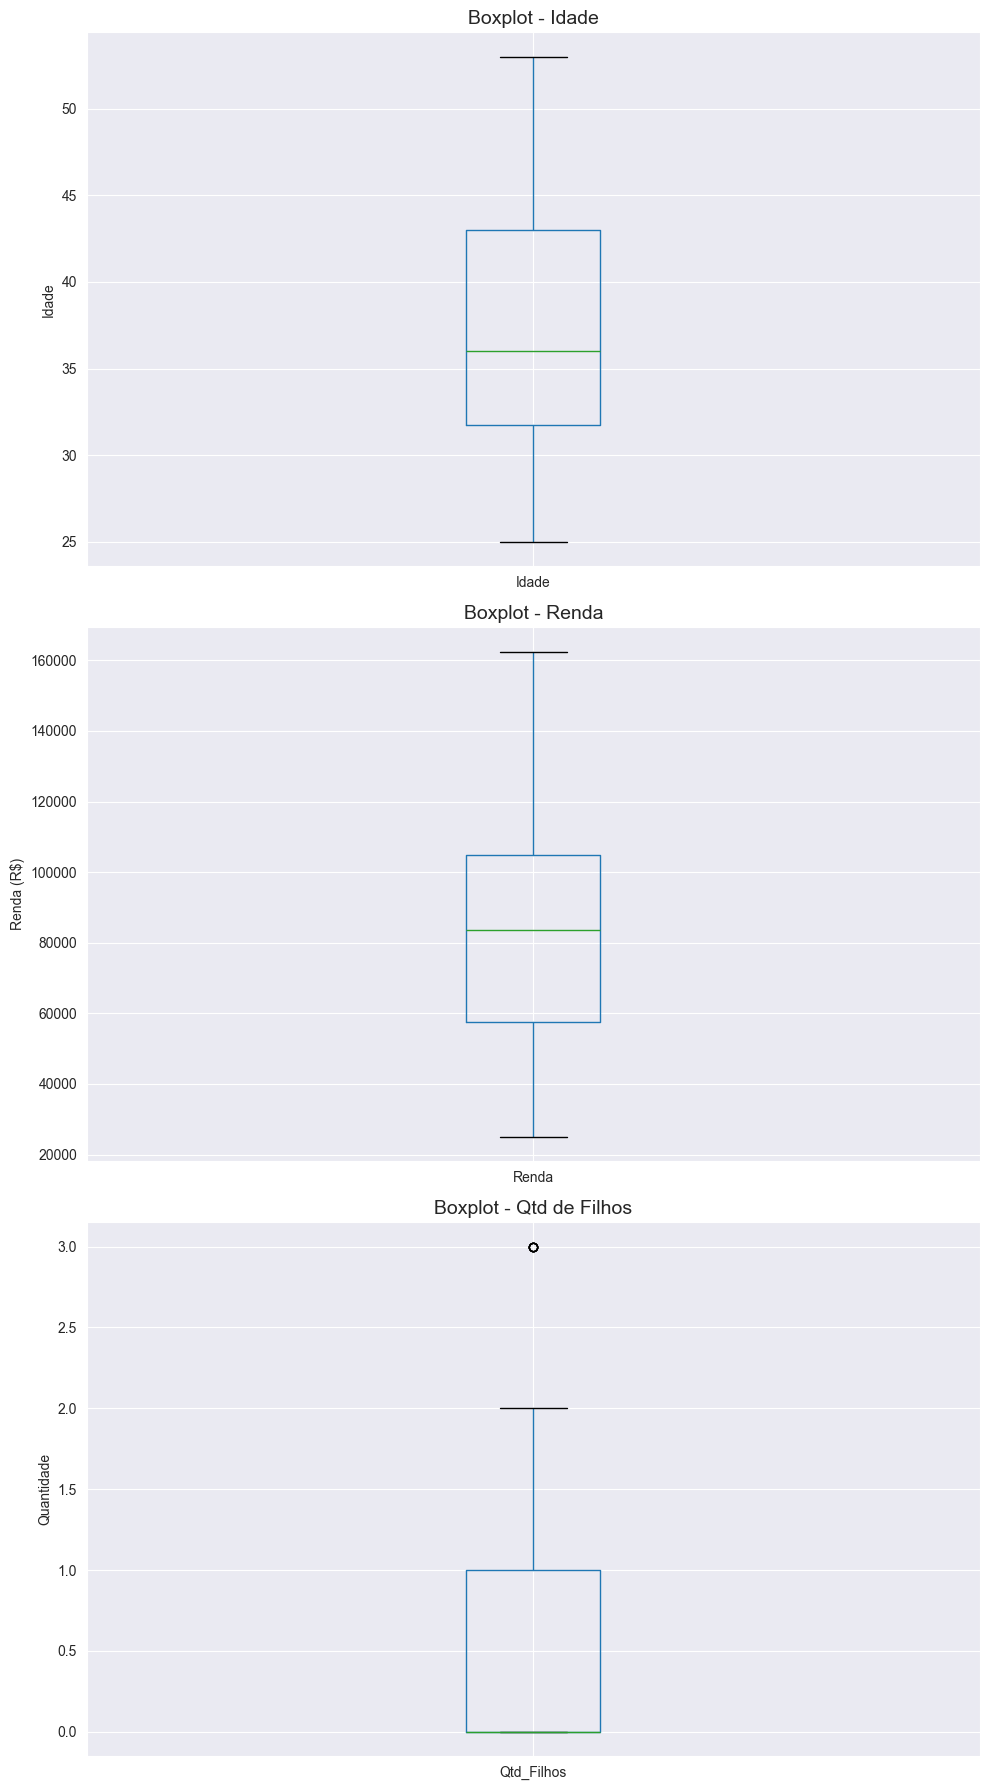

In [12]:
import matplotlib.pyplot as plt

# Criar figura com 3 linhas e 1 coluna (um gráfico em cada linha)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# Boxplot - Idade
df.boxplot(column='Idade', ax=axes[0])
axes[0].set_title('Boxplot - Idade', fontsize=14)
axes[0].set_ylabel('Idade')

# Boxplot - Renda
df.boxplot(column='Renda', ax=axes[1])
axes[1].set_title('Boxplot - Renda', fontsize=14)
axes[1].set_ylabel('Renda (R$)')

# Boxplot - Qtd de Filhos
df.boxplot(column='Qtd_Filhos', ax=axes[2])
axes[2].set_title('Boxplot - Qtd de Filhos', fontsize=14)
axes[2].set_ylabel('Quantidade')

plt.tight_layout()
plt.show()


### Análise Univariada – Variáveis Numéricas
Nesta etapa, foram gerados boxplots para as variáveis numéricas: Idade, Renda e Qtd_Filhos, com o objetivo de visualizar a distribuição dos dados e identificar possíveis outliers.

* Idade: 
A distribuição da idade mostra uma leve assimetria à direita, com poucos valores extremos (outliers) acima de 50 anos. A mediana está próxima dos 35 anos, o que indica que metade dos clientes tem idade inferior a esse valor.

* Renda: 
A variável de renda apresenta maior variabilidade. Existem valores muito altos que são considerados outliers, mas como se trata de uma variável econômica, esses pontos extremos podem refletir clientes com renda muito acima da média e podem ser mantidos dependendo do contexto do negócio.

* Qtd_Filhos: 
A quantidade de filhos tem distribuição concentrada em 0 e 1 filho, com alguns outliers como 2 ou 3 filhos. Esses valores são esperados e não indicam necessariamente erro nos dados.

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

### Agora irei fazer a análise univariada e os insights de várias variáveis categóricas. 

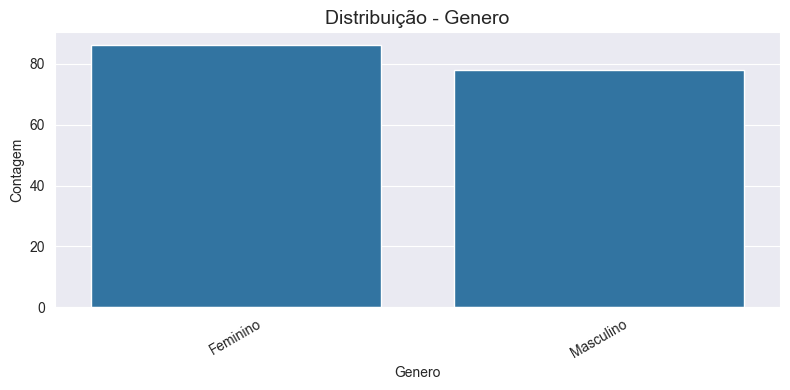

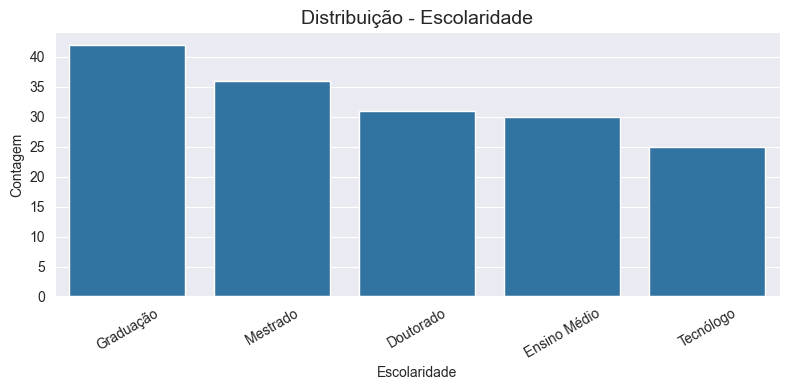

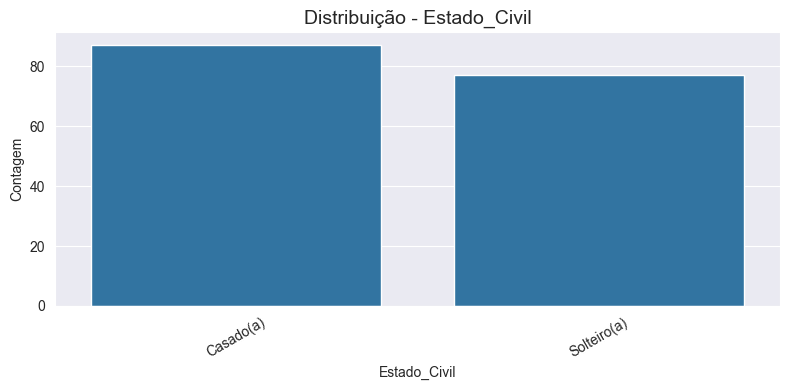

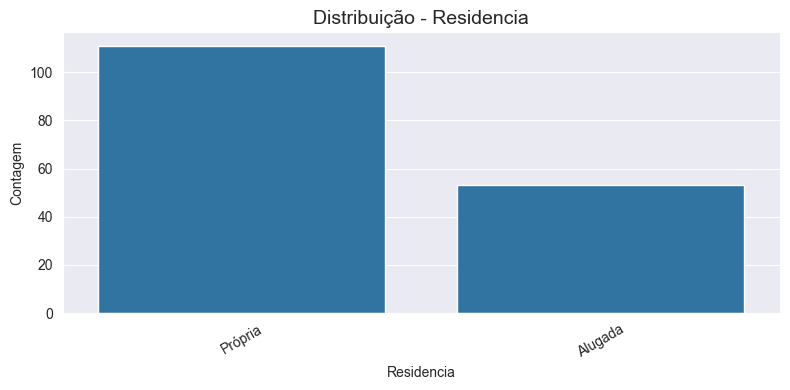

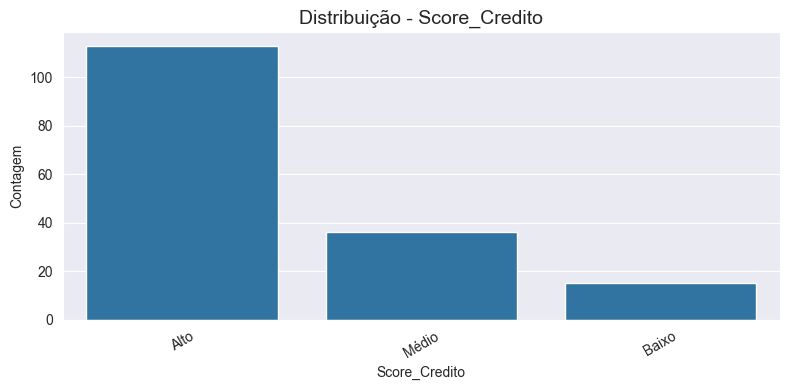

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variáveis categóricas
categoricas = ['Genero', 'Escolaridade', 'Estado_Civil', 'Residencia', 'Score_Credito']

# Plotar gráficos de barras para cada variável categórica
for coluna in categoricas:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=coluna, order=df[coluna].value_counts().index)
    plt.title(f'Distribuição - {coluna}', fontsize=14)
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

#### ✔️ Tratamento de Outliers:
Foi identificada a presença de outliers nas colunas `Renda` e `Qtd_Filhos`, conforme verificado pelos boxplots. Os valores foram analisados visualmente e optamos por mantê-los, pois podem representar casos reais (como rendas muito altas).

#### ✔️ Análise das Variáveis Categóricas:

- **Gênero:** A base está relativamente balanceada entre Masculino e Feminino.
- **Escolaridade:** A maioria dos clientes possui graduação, seguidos por mestrado e doutorado.
- **Estado Civil:** Mais clientes são casados(as) do que solteiros(as).
- **Residência:** A maior parte mora em residência própria.
- **Score de Crédito:** A distribuição mostra que a maioria dos clientes tem score **Alto**, seguido por **Médio** e **Baixo**.

Esses dados são importantes para identificar perfis predominantes entre os clientes e servirão de base para a análise bivariada na próxima etapa (2D).

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



## Existe relação entre a idade e o status civil?
 Vou analisar a distribuição da idade em função do estado civil, utilizando um boxplot. Isso pode indicar se há variações relevantes na idade entre pessoas casadas e solteiras.


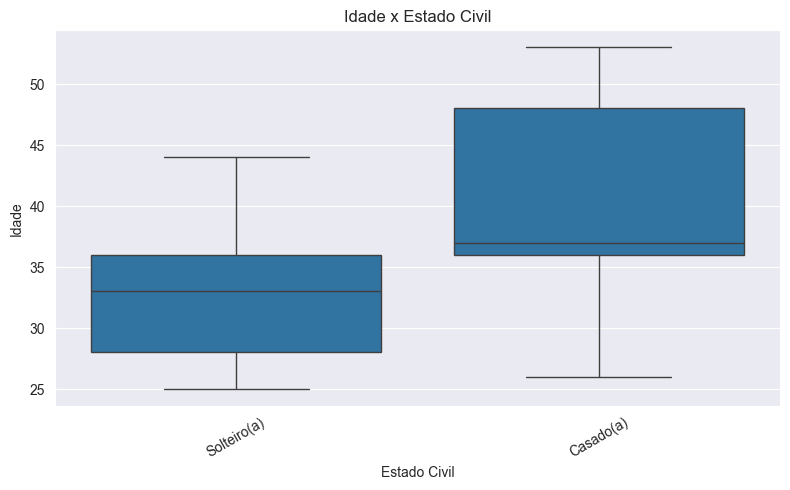

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Estado_Civil', y='Idade', data=df)
plt.title('Idade x Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Idade')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## Qual a relação entre o score de crédito e o nível de escolaridade?

Vou explorar como o nível de escolaridade se relaciona com o score de crédito. Isso pode nos ajudar a entender se a escolaridade tem influência no perfil de risco do cliente.

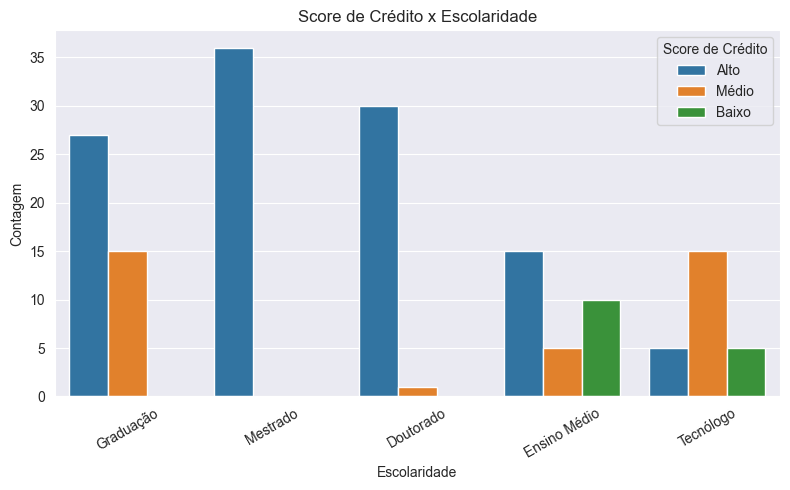

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Escolaridade', hue='Score_Credito', data=df)
plt.title('Score de Crédito x Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')
plt.xticks(rotation=30)
plt.legend(title='Score de Crédito')
plt.tight_layout()
plt.show()


## O salário parece influenciar na idade?

Vou verificar se existe alguma tendência entre salário e idade por meio de um scatterplot. Essa relação pode indicar perfis de carreira ou experiência.

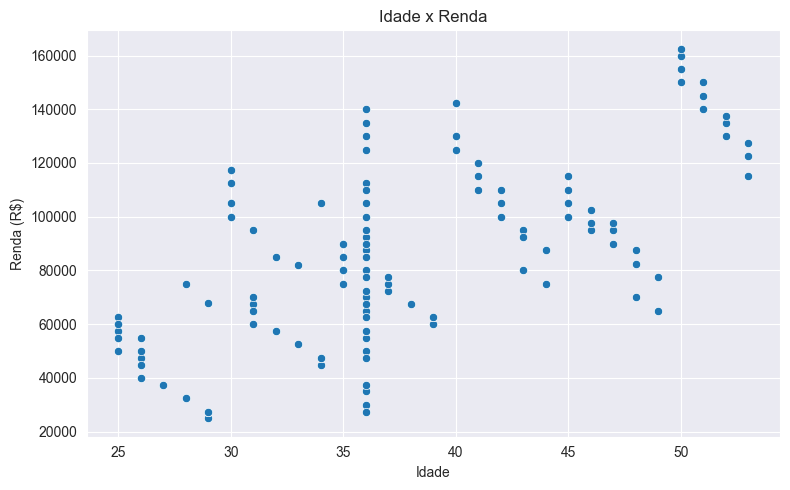

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Idade', y='Renda', data=df)
plt.title('Idade x Renda')
plt.xlabel('Idade')
plt.ylabel('Renda (R$)')
plt.tight_layout()
plt.show()


## O salário parece influenciar no Score de Crédito?

Vou verificar se há diferença nas rendas dos clientes com diferentes scores de crédito. O boxplot é adequado para visualizar isso.

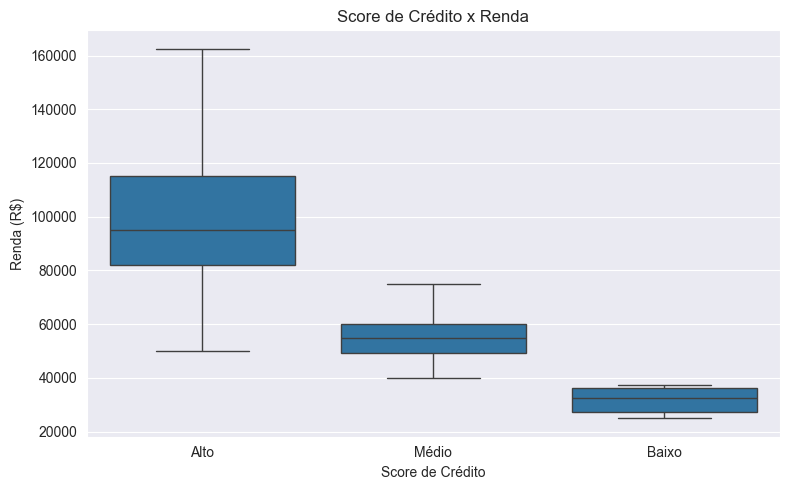

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Score_Credito', y='Renda', data=df)
plt.title('Score de Crédito x Renda')
plt.xlabel('Score de Crédito')
plt.ylabel('Renda (R$)')
plt.tight_layout()
plt.show()


## Clientes com casa própria tendem a ter um score mais alto?

Por fim, vou cruzar a variável de residência (própria ou alugada) com o score de crédito para investigar se há um padrão.

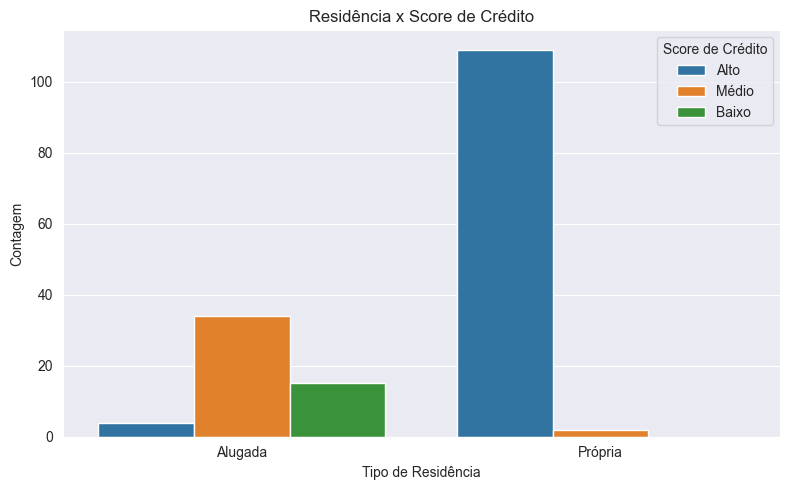

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Residencia', hue='Score_Credito', data=df)
plt.title('Residência x Score de Crédito')
plt.xlabel('Tipo de Residência')
plt.ylabel('Contagem')
plt.legend(title='Score de Crédito')
plt.tight_layout()
plt.show()


## Conclusões das análises:

1. Idade vs Estado Civil
Insight: Pessoas casadas tendem a ter uma idade média mais elevada do que pessoas solteiras.

Interpretação: Isso é esperado, pois o casamento geralmente ocorre após uma certa maturidade, o que pode influenciar na estabilidade financeira e no comportamento de crédito.

2. Score de Crédito vs Escolaridade
Insight: Clientes com maior escolaridade (Mestrado e Doutorado) apresentam predominantemente scores de crédito mais altos.

Interpretação: Níveis mais altos de escolaridade podem estar relacionados com melhores empregos, maior estabilidade financeira e, consequentemente, menor risco de crédito.

3. Idade vs Renda
Insight: Existe uma tendência de aumento na renda com o avanço da idade, até certo ponto. No entanto, há bastante dispersão.

Interpretação: A experiência tende a impactar positivamente a renda, mas outros fatores (cargo, setor, escolaridade) também afetam. Alguns jovens já apresentam alta renda, indicando variações possíveis.

4. Score de Crédito vs Renda
Insight: Clientes com score de crédito mais alto geralmente apresentam maior renda.

Interpretação: Uma renda mais elevada tende a facilitar o pagamento de dívidas e compromissos, impactando positivamente o score de crédito.

5. Score de Crédito vs Tipo de Residência
Insight: A maioria dos clientes com residência própria possui score de crédito mais alto.

Interpretação: Possuir casa própria pode ser um indicativo de estabilidade financeira, o que influencia positivamente o score de crédito.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

### Análise: Renda vs Idade
Vou verificar se há alguma tendência entre a idade e o aumento da renda, utilizando um gráfico de dispersão.


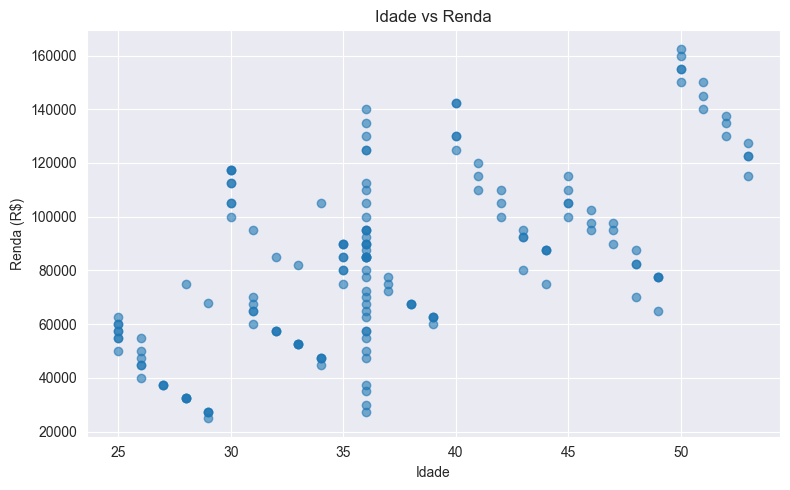

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['Idade'], df['Renda'], alpha=0.6)
plt.xlabel('Idade')
plt.ylabel('Renda (R$)')
plt.title('Idade vs Renda')
plt.tight_layout()
plt.show()


### Análise: Renda por Gênero
Vou usar um boxplot para observar como a renda varia entre os gêneros e se há diferença significativa.


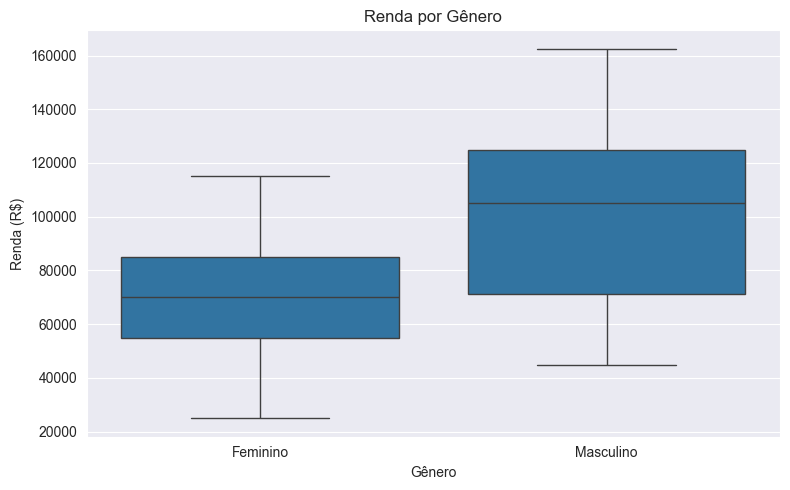

In [23]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='Genero', y='Renda', data=df)
plt.title('Renda por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Renda (R$)')
plt.tight_layout()
plt.show()


### Análise: Renda por Estado Civil
Utilizarei também um boxplot para comparar os níveis de renda entre pessoas casadas e solteiras.


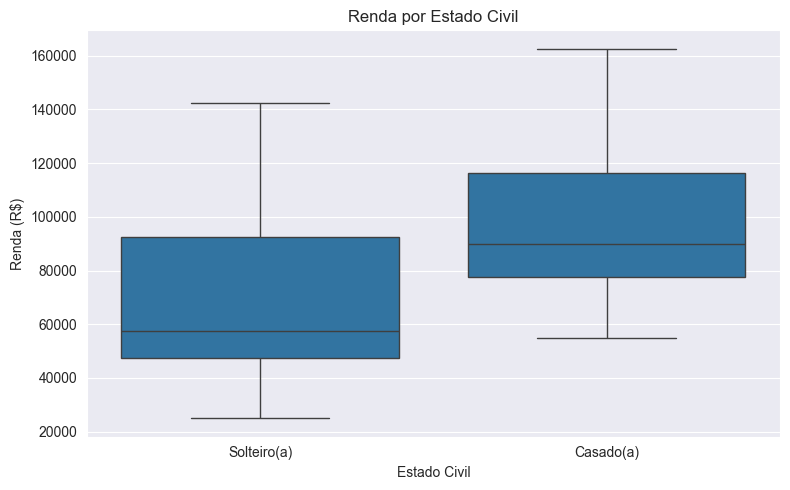

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Estado_Civil', y='Renda', data=df)
plt.title('Renda por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Renda (R$)')
plt.tight_layout()
plt.show()


#### 1. Análise: Renda vs Idade
Verifiquei se há uma relação entre a idade dos clientes e seus níveis de renda.

**📌 Insight:**
O gráfico de dispersão mostra uma distribuição ampla da renda ao longo das idades. Nota-se uma leve tendência de aumento da renda com o avanço da idade, mas a grande dispersão dos pontos sugere que a idade não é o único fator. Jovens com alta renda também aparecem no conjunto, indicando que escolaridade, cargo e setor profissional também influenciam.

---

#### 2. Análise: Renda por Gênero
Explorei se há diferença salarial entre os gêneros.

**📌 Insight:**
O boxplot revela que a mediana da renda é mais alta entre os homens, com uma maior variação de renda nesse grupo, incluindo valores extremos mais elevados. Isso sugere uma possível desigualdade de gênero no acesso a cargos mais bem remunerados ou variações no tipo de ocupação e jornada de trabalho entre os sexos.

---

#### 3. Análise: Renda por Estado Civil
Investiguei se o estado civil está associado a diferentes níveis de renda.

**📌 Insight:**
O boxplot mostra que pessoas casadas possuem, em média, maior renda que pessoas solteiras. A faixa de rendimento também é mais ampla entre os casados. Isso pode refletir maior estabilidade no mercado de trabalho, maiores responsabilidades financeiras ou até mesmo rendas familiares somadas.

---

### ✅ Conclusão da Etapa 2E

As análises adicionais reforçam que variáveis como idade, gênero e estado civil afetam a renda de maneira relevante. Isso destaca a importância de considerar múltiplos fatores ao tentar entender o perfil de crédito dos clientes, e servirá de base para as etapas de correlação e modelagem a seguir.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

### Etapa 3A – Análise de Correlação

Vou gerar a matriz de correlação entre as variáveis numéricas da base, utilizando o método `.corr()` do pandas. Em seguida, utilizarei um mapa de calor (heatmap) para facilitar a visualização das correlações.


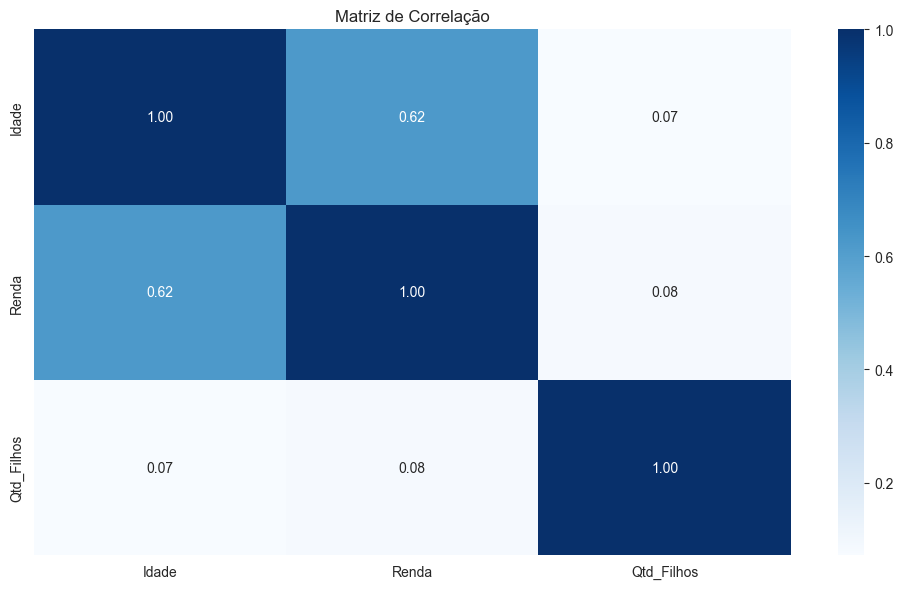

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleciona apenas colunas numéricas
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Matriz de correlação
corr = df_numerico.corr()

# Plot do heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()


#### Principais Conclusões:

- `Idade` e `Renda` apresentaram **correlação moderada positiva** (0.62), o que é esperado, visto que pessoas mais velhas tendem a ter rendas maiores.
- `Idade` e `Qtd_Filhos` têm correlação fraca (0.07), indicando pouca relação entre essas variáveis.
- `Renda` e `Qtd_Filhos` também têm correlação muito fraca (0.08), mostrando que ter mais filhos não está associado diretamente a maior ou menor renda na base analisada.

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

### Variáveis com Correlação Média ou Alta

As únicas variáveis com correlação razoável foram `Idade` e `Renda`. Essa correlação faz sentido, pois com o passar dos anos, geralmente há aumento de experiência profissional, o que pode refletir em melhores salários.

Já as variáveis `Qtd_Filhos` mostraram correlação fraca com as demais, indicando que filhos não interferem diretamente nas variáveis `Renda` ou `Idade` no contexto desta base.


**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

Nesta etapa, as variáveis categóricas como `Gênero`, `Escolaridade`, `Estado Civil`, `Residência`, `Score de Crédito` devem ser convertidas para representação numérica.

#### Vou usar:
- `LabelEncoder` para variáveis **ordinais** (ex: Escolaridade);
- `OneHotEncoder` para variáveis **nominais** (ex: Estado Civil, Gênero).

Após isso, vou remover as colunas categóricas originais para evitar multicolinearidade.

In [29]:
df_encoded = pd.get_dummies(df, columns=['Genero', 'Estado_Civil', 'Residencia'], drop_first=True)


In [30]:
from sklearn.preprocessing import LabelEncoder

# Copiando o DataFrame original para preservar
df_encoded = df.copy()

# Codificando variáveis ordinais
le = LabelEncoder()
df_encoded['Escolaridade'] = le.fit_transform(df_encoded['Escolaridade'])
df_encoded['Score_Credito'] = le.fit_transform(df_encoded['Score_Credito'])

# Codificando variáveis nominais com One-Hot
df_encoded = pd.get_dummies(df_encoded, columns=['Genero', 'Estado_Civil', 'Residencia'], drop_first=True)

# Visualizar as primeiras linhas após o encoding
df_encoded.head()


,Idade,Renda,Escolaridade,Qtd_Filhos,Score_Credito,Genero_Masculino,Estado_Civil_Solteiro(a),Residencia_Própria
0,25.0,50000.0,2,0,0,False,True,False
1,30.0,100000.0,3,2,0,True,False,True
2,35.0,75000.0,0,1,0,False,False,True
3,40.0,125000.0,1,0,0,True,True,True
4,45.0,100000.0,2,3,0,False,False,True


**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

#### Etapa 3D: Análise de Correlação com Variáveis Codificadas

Agora que as variáveis categóricas foram convertidas, vou gerar novamente a matriz de correlação para investigar se surgiram novas relações fortes entre os atributos.


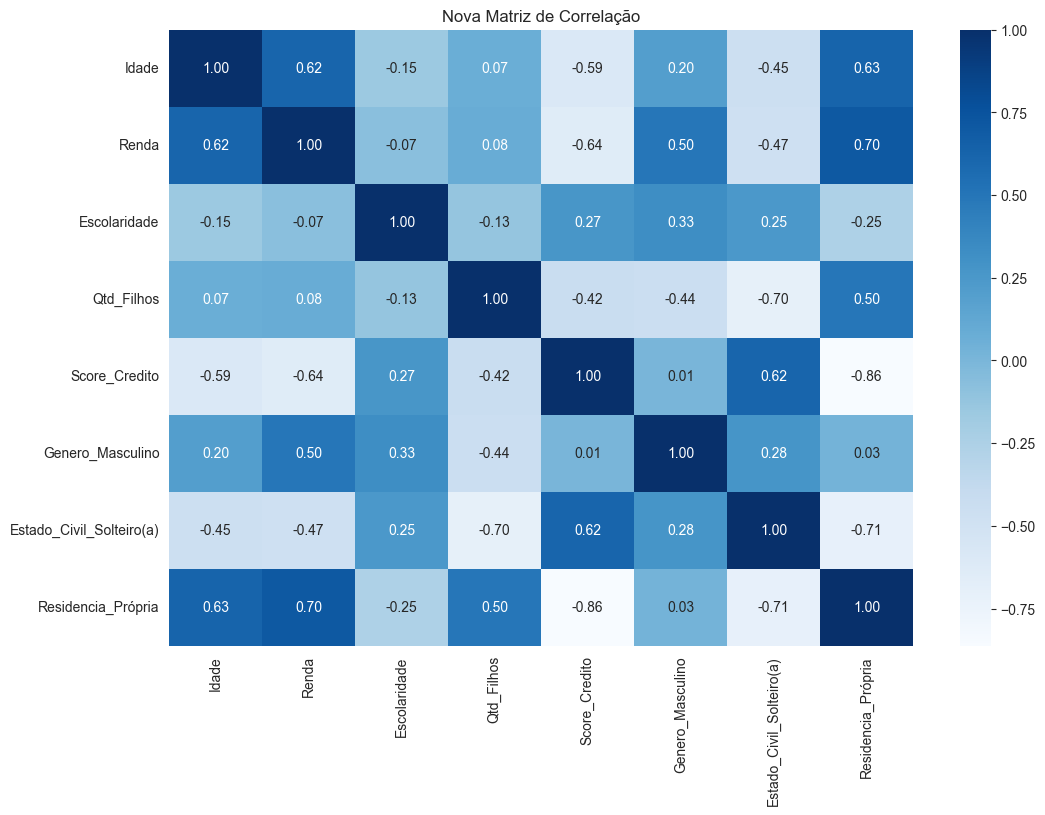

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlação com atributos numéricos e codificados
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Nova Matriz de Correlação")
plt.show()



### Etapa 3D: Análise da Nova Matriz de Correlação

Após a codificação das variáveis categóricas, geramos uma nova matriz de correlação para identificar relações mais significativas com a variável-alvo (`Score_Credito`).

#### Principais insights:

- **Residência_Própria** apresentou a **maior correlação negativa** com o Score de Crédito (-0.86). Isso indica que clientes sem residência própria têm maior probabilidade de score mais baixo.
- **Estado_Civil_Solteiro(a)** também tem **forte correlação negativa** (-0.71), sugerindo que pessoas solteiras tendem a ter score de crédito mais baixo.
- **Qtd_Filhos** tem correlação negativa moderada com `Score_Credito` (-0.42), indicando que mais filhos podem impactar negativamente o score.
- Por outro lado, **Escolaridade** e **Gênero Masculino** apresentam correlação positiva leve com `Score_Credito` (0.27 e 0.01 respectivamente), indicando uma possível influência positiva, embora fraca.
- **Renda** e **Idade** perderam um pouco da correlação direta com o score (-0.64 e -0.59), mas ainda mantêm relevância.

#### Conclusão:
As variáveis categóricas após codificação se mostraram relevantes para análise de crédito. Podemos concluir que atributos sociais e patrimoniais (residência, estado civil e filhos) estão mais fortemente associados ao score do que atributos puramente econômicos.

A etapa 3D está finalizada, e agora seguimos com a separação treino/teste e o balanceamento da variável alvo.


**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

### Etapa 3F: Separação da Base em Treino e Teste

Nesta etapa, dividirei nossa base codificada em variáveis independentes (X) e a variável alvo (y - Score de Crédito). Em seguida, utilizaremos a função `train_test_split` do `sklearn` para dividir os dados em conjuntos de treino e teste, mantendo uma proporção de 70/30.


In [33]:
from sklearn.model_selection import train_test_split

# Separando variáveis independentes e alvo
X = df_encoded.drop('Score_Credito', axis=1)
y = df_encoded['Score_Credito']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificando as dimensões
print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)


Shape X_train: (114, 7)
Shape X_test: (50, 7)
Shape y_train: (114,)
Shape y_test: (50,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

### Etapa 3G: Verificando o Balanceamento da Variável Alvo

Antes de aplicar qualquer técnica de balanceamento, vou analisar se a variável `Score_Credito` está desbalanceada na base de treino. Vou utilizar um gráfico de barras e a contagem de valores.


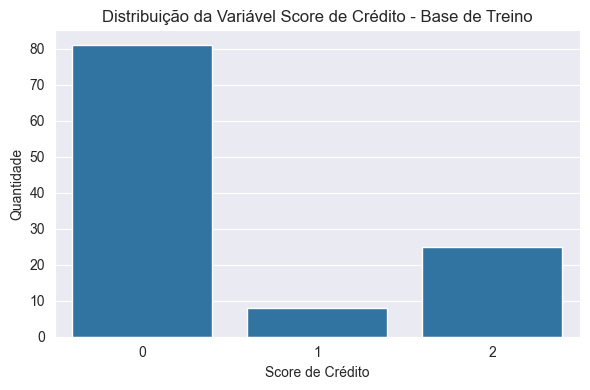

Score_Credito
0    0.710526
2    0.219298
1    0.070175
Name: proportion, dtype: float64


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico da distribuição da variável alvo
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Distribuição da Variável Score de Crédito - Base de Treino')
plt.xlabel('Score de Crédito')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

# Distribuição percentual
print(y_train.value_counts(normalize=True))


### Com base no gráfico e nos dados de proporção da Etapa 3G, pode-se observar que a variável Score_Credito está altamente desbalanceada:

Classe 0: ~71% dos casos

Classe 2: ~22%

Classe 1: ~7%

⚠️ Isso pode prejudicar o desempenho dos modelos, especialmente para prever a classe 1, que aparece pouco nos dados.



**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

### Etapa 3H: Realizando o Balanceamento da Variável Score de Crédito

Vou aplicar a técnica de sobremostragem `RandomOverSampler` para corrigir o desbalanceamento na base de treino. Essa técnica replica amostras das classes minoritárias para equilibrar a distribuição.


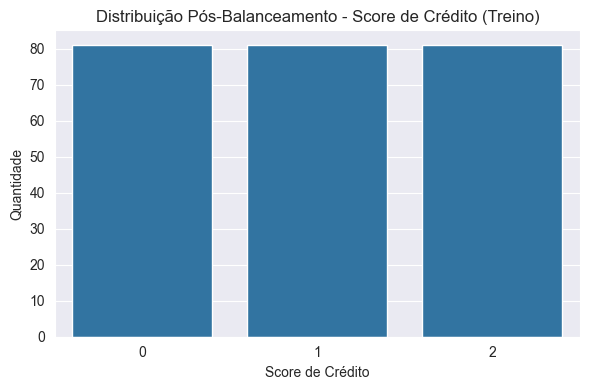

Score_Credito
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64


In [35]:
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Balanceando a base de treino
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

# Verificando a nova distribuição
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_bal)
plt.title('Distribuição Pós-Balanceamento - Score de Crédito (Treino)')
plt.xlabel('Score de Crédito')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

# Proporções balanceadas
print(y_train_bal.value_counts(normalize=True))


### Após o balanceamento, todas as classes da variável `Score_Credito` possuem exatamente 33,33% da base de treino, resolvendo o problema de desbalanceamento.


In [36]:
df_final = pd.concat([X_train_bal, y_train_bal], axis=1)
df_final.to_csv("CREDIT_SCORE_PROJETO_PARTE1_preparada.csv", index=False)
